In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [24]:
#1Lisez les données et afficher un appercu des 5 premiers lignes:

data = pd.read_csv("Maternal_Risk.csv")
print(data.head())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk


In [25]:
# 2 Obtenez des informations sur le DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          808 non-null    int64  
 1   SystolicBP   808 non-null    int64  
 2   DiastolicBP  808 non-null    int64  
 3   BS           808 non-null    float64
 4   BodyTemp     808 non-null    float64
 5   HeartRate    808 non-null    int64  
 6   RiskLevel    808 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 44.3+ KB


In [26]:
# 3 Comptez les valeurs manquantes 
duplicates = data.duplicated().sum()
print(missing_values)


Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [27]:
#3 Recherchez les lignes dupliquéesvaleurs manquantes
duplicates = data.duplicated().sum()
print(duplicates)


463


In [28]:
# 4 Obtenez toutes les valeurs distinctes dans chaque colonne
unique_values = {col: data[col].unique() for col in data.columns}
print(unique_values)


{'Age': array([25, 35, 29, 30, 23, 42, 15, 50, 10, 40, 21, 18, 16, 19, 22, 49, 28,
       20, 12, 60, 55, 45, 32, 48, 34, 38, 39, 63, 54, 14, 37, 17, 24, 31,
       27, 13, 59, 33, 43, 41, 46, 51, 62, 65, 66, 56, 70, 36],
      dtype=int64), 'SystolicBP': array([130, 140,  90, 120,  85, 110,  70, 100,  75,  95,  76,  80, 135,
       160,  99,  78,  83, 129], dtype=int64), 'DiastolicBP': array([ 80,  90,  70,  85,  60,  89, 100,  50,  65,  75,  95,  49,  76,
        68,  63,  69], dtype=int64), 'BS': array([15.  , 13.  ,  8.  ,  7.  ,  6.1 ,  7.01, 11.  , 18.  ,  6.9 ,
        7.5 ,  7.2 ,  7.1 ,  6.7 ,  6.4 ,  6.8 ,  7.9 , 17.  ,  9.  ,
       19.  , 16.  ,  6.  ,  6.5 , 12.  ,  6.6 ,  7.6 , 10.  ,  7.7 ,
        6.3 ,  7.8 ]), 'BodyTemp': array([ 98. , 100. , 102. , 101. ,  99. ,  98.4, 103. ,  98.6]), 'HeartRate': array([86, 70, 80, 76, 77, 90, 66, 82, 88, 60, 75, 78,  7, 67, 65],
      dtype=int64), 'RiskLevel': array(['high risk', 'low risk'], dtype=object)}


In [29]:
# 5 Résumé statistique du DataFrame
table = data.describe()
print(table)

              Age  SystolicBP  DiastolicBP          BS    BodyTemp   HeartRate
count  808.000000  808.000000   808.000000  808.000000  808.000000  808.000000
mean    30.585396  112.972772    77.500000    9.264839   98.640347   74.297030
std     13.922075   19.924312    14.772207    3.617635    1.386501    8.822686
min     10.000000   70.000000    49.000000    6.000000   98.000000    7.000000
25%     19.000000   90.000000    65.000000    7.000000   98.000000   70.000000
50%     27.000000  120.000000    80.000000    7.500000   98.000000   76.000000
75%     40.000000  120.000000    90.000000   11.000000   98.000000   80.000000
max     70.000000  160.000000   100.000000   19.000000  103.000000   90.000000


In [34]:
#6 Convertir les valeurs de la colonne en valeurs numériques
le = LabelEncoder()
data_label = data.copy()
data_label['RiskLevel'] = le.fit_transform(data_label['RiskLevel'])
print(data_label)

     Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0     25         130           80  15.0      98.0         86          0
1     35         140           90  13.0      98.0         70          0
2     29          90           70   8.0     100.0         80          0
3     30         140           85   7.0      98.0         70          0
4     35         120           60   6.1      98.0         76          1
..   ...         ...          ...   ...       ...        ...        ...
803   24         120           80   7.5      98.0         66          1
804   16         100           70   7.5      98.0         80          1
805   19         120           76   7.5      98.0         66          1
806   40         160          100  19.0      98.0         77          0
807   32         140           90  18.0      98.0         88          0

[808 rows x 7 columns]


In [37]:
# Calculez la matrice de corrélation
corr = data_label.corr()
print(corr)

                  Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate  \
Age          1.000000    0.459576     0.440481  0.470890 -0.293673   0.093484   
SystolicBP   0.459576    1.000000     0.866559  0.487461 -0.303682   0.028800   
DiastolicBP  0.440481    0.866559     1.000000  0.438310 -0.287651   0.025101   
BS           0.470890    0.487461     0.438310  1.000000 -0.124890   0.172422   
BodyTemp    -0.293673   -0.303682    -0.287651 -0.124890  1.000000   0.021143   
HeartRate    0.093484    0.028800     0.025101  0.172422  0.021143   1.000000   
RiskLevel   -0.319189   -0.434097    -0.403863 -0.664571 -0.189497  -0.212165   

             RiskLevel  
Age          -0.319189  
SystolicBP   -0.434097  
DiastolicBP  -0.403863  
BS           -0.664571  
BodyTemp     -0.189497  
HeartRate    -0.212165  
RiskLevel     1.000000  


In [50]:
#7 Visualisez la matrice de corrélation sous forme de carte thermique


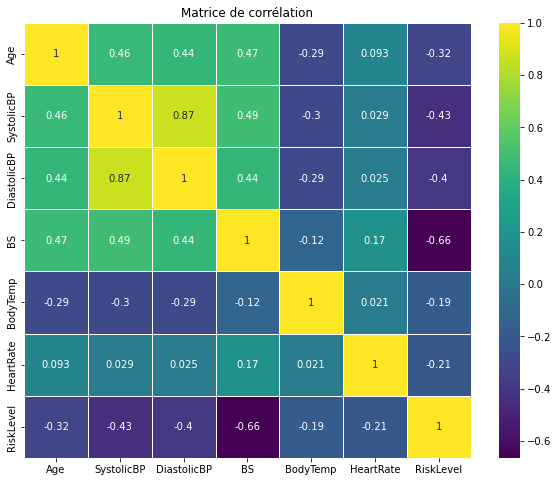

In [56]:
feature_order = corr.columns[::-1]
corr_inversed = corr[feature_order][::-1]

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='viridis', linewidths=.5)
plt.title("Matrice de corrélation")
plt.show()


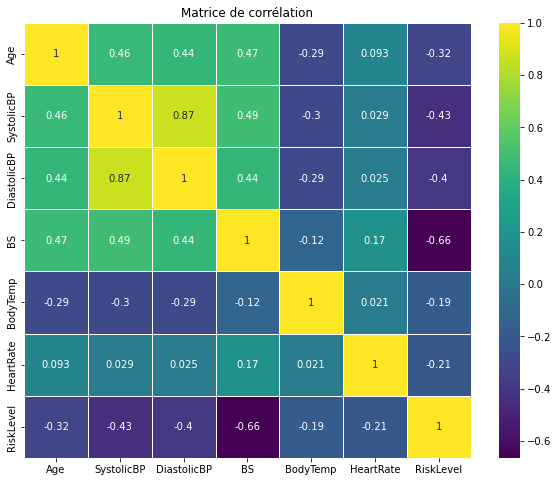

In [53]:
# Affichez la carte thermique en utilisant la fonction plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='viridis', linewidths=.5)


plt.title("Matrice de corrélation")
plt.show()

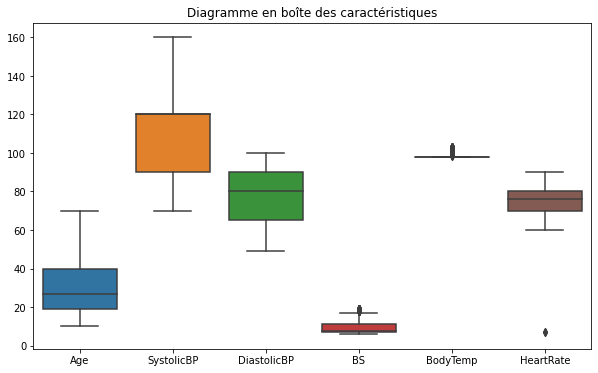

In [51]:
#2 a. créer un diagramme en boite pour chaque caractéristique :
features = data.drop('RiskLevel', axis=1)
plt.figure(figsize=(10, 6))
sns.boxplot(data=features)
plt.title("Diagramme en boîte des caractéristiques")

#afficher le diagramme
plt.show()


In [ ]:
#